In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import tqdm as tqdm
from colorthief import ColorThief
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_excel("data/ESC-2016-grand_final-full_results.xls")
df.head()

,Eurovision Song Contest 2016 Grand Final,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1,Albania,Belgium,20,16,24,22,24,25,14,\n,\n
2,Albania,Czech Republic,21,15,25,23,16,22,22,\n,\n
3,Albania,The Netherlands,22,14,23,24,21,24,24,\n,\n
4,Albania,Azerbaijan,19,12,11,21,11,13,19,\n,\n


In [3]:
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)

In [4]:
df.head(20)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1,Albania,Belgium,20,16,24,22,24,25,14,\n,\n
2,Albania,Czech Republic,21,15,25,23,16,22,22,\n,\n
3,Albania,The Netherlands,22,14,23,24,21,24,24,\n,\n
4,Albania,Azerbaijan,19,12,11,21,11,13,19,\n,\n
5,Albania,Hungary,8,13,9,14,9,10,10,1,1
6,Albania,Italy,4,10,3,7,2,3,2,8,10
7,Albania,Israel,10,2,18,4,12,8,17,3,\n
8,Albania,Bulgaria,11,3,6,13,6,7,3,4,8
9,Albania,Sweden,16,8,15,6,15,11,8,\n,3
10,Albania,Germany,18,17,20,11,17,18,15,\n,\n


In [5]:
df["From country"].replace({"Bosnia & Herzegovina" : "Bosnia and Herzegovina"}, inplace=True)
df["To country"].replace({"Bosnia & Herzegovina" : "Bosnia and Herzegovina"}, inplace=True)
df["From country"].replace({"F.Y.R. Macedonia" : "Macedonia"}, inplace=True)
df["To country"].replace({"F.Y.R. Macedonia" : "Macedonia"}, inplace=True)

In [6]:
df[df["From country"] == "Macedonia"]

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
356,Macedonia,Belgium,19,7,11,4,13,7,7,4,4
357,Macedonia,Czech Republic,20,15,10,11,18,17,25,\n,\n
358,Macedonia,The Netherlands,5,8,24,2,24,9,19,2,\n
359,Macedonia,Azerbaijan,21,16,8,12,10,10,24,1,\n
360,Macedonia,Hungary,22,24,12,13,8,20,14,\n,\n
361,Macedonia,Italy,11,17,21,14,21,22,10,\n,1
362,Macedonia,Israel,14,6,7,15,12,6,16,5,\n
363,Macedonia,Bulgaria,6,4,4,3,7,2,2,10,10
364,Macedonia,Sweden,10,13,23,1,22,13,15,\n,\n
365,Macedonia,Germany,18,25,17,16,23,24,23,\n,\n


In [7]:
jury = df[["From country","To country","Jury Points","Jury Rank"]]
jury = jury[jury["Jury Points"] != "\n"].reset_index(drop=True)
televote = df[["From country","To country","Televote Points","Televote Rank"]]
televote = televote[televote["Televote Points"] != "\n"].reset_index(drop=True)

In [8]:
jury["Total"] = jury["Jury Points"].groupby(jury["To country"]).transform('sum')
televote["Total"] = televote["Televote Points"].groupby(jury["To country"]).transform('sum')

In [9]:
jury.head()

,From country,To country,Jury Points,Jury Rank,Total
0,Albania,Hungary,1,10,52
1,Albania,Italy,8,3,90
2,Albania,Israel,3,8,124
3,Albania,Bulgaria,4,7,127
4,Albania,France,10,2,148


In [10]:
televote.head()

,From country,To country,Televote Points,Televote Rank,Total
0,Albania,Hungary,1,10,48
1,Albania,Italy,10,2,64
2,Albania,Bulgaria,8,3,145
3,Albania,Sweden,3,8,113
4,Albania,Poland,5,6,120


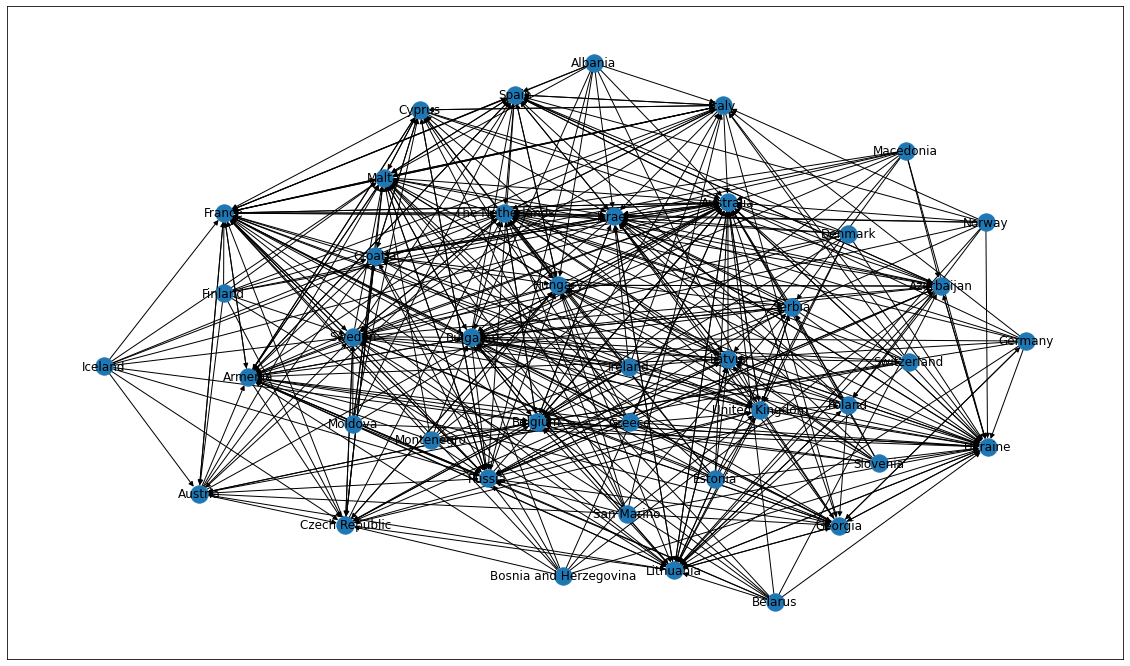

In [11]:
G = nx.from_pandas_edgelist(jury, 
                            source='From country',
                            target='To country',
                            edge_attr='Jury Points',
                            create_using=nx.DiGraph())

plt.figure(figsize=(20,12))                        
nx.draw_networkx(G)

In [12]:
G.out_degree(weight='Jury Points')

OutDegreeView({'Albania': 58, 'Hungary': 58, 'Italy': 58, 'Israel': 58, 'Bulgaria': 58, 'France': 58, 'Australia': 58, 'Russia': 58, 'Spain': 58, 'Malta': 58, 'United Kingdom': 58, 'Armenia': 58, 'Belgium': 58, 'Czech Republic': 58, 'Cyprus': 58, 'Georgia': 58, 'The Netherlands': 58, 'Lithuania': 58, 'Croatia': 58, 'Ukraine': 58, 'Austria': 58, 'Sweden': 58, 'Azerbaijan': 58, 'Poland': 58, 'Belarus': 58, 'Bosnia and Herzegovina': 58, 'Serbia': 58, 'Latvia': 58, 'Denmark': 58, 'Estonia': 58, 'Macedonia': 58, 'Finland': 58, 'Germany': 58, 'Greece': 58, 'Iceland': 58, 'Ireland': 58, 'Moldova': 58, 'Montenegro': 58, 'Norway': 58, 'San Marino': 58, 'Slovenia': 58, 'Switzerland': 58})

In [13]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['Jury Points']>0])

In [14]:
print(nx.info(Gsub))

Name: 
Type: DiGraph
Number of nodes: 42
Number of edges: 420
Average in degree:  10.0000
Average out degree:  10.0000


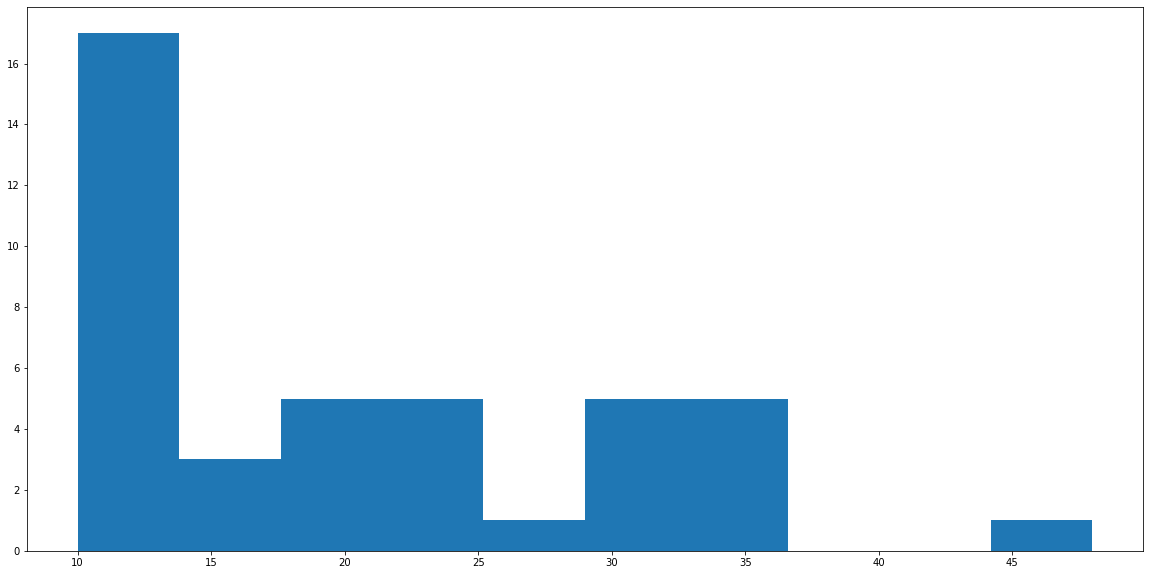

In [15]:
plt.hist(dict(Gsub.degree()).values())
plt.show()

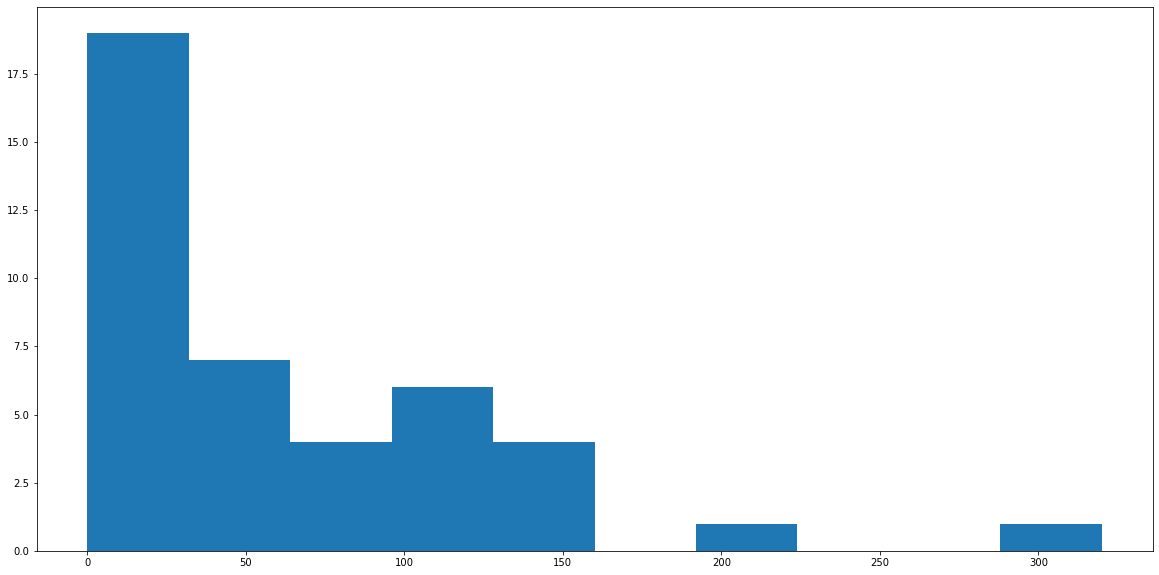

In [16]:
h = plt.hist(dict(G.in_degree(weight='Jury Points')).values())

In [17]:
deg_cen_points = dict(G.in_degree(weight='Jury Points'))
{k:deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k]==max(deg_cen_points.values())}

{'Australia': 320}

In [18]:
countries = pd.read_csv("data/countries.csv")
countries["Country"].replace({"Netherlands" : "The Netherlands"}, inplace=True)
countries = countries.set_index("Country")

In [19]:
position = {}
for node in G.nodes():
    position[node] = (
                    max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
                    max(countries.loc[node]['latitude'],25) #fixing scale
    )

In [20]:
position

{'Albania': (20.0, 41.0),
 'Hungary': (20.0, 47.0),
 'Italy': (12.8333, 42.8333),
 'Israel': (37.0, 28.0),
 'Bulgaria': (25.0, 43.0),
 'France': (2.0, 46.0),
 'Australia': (55, 25),
 'Russia': (50.0, 60.0),
 'Spain': (-4.0, 40.0),
 'Malta': (14.5833, 35.8333),
 'United Kingdom': (-2.0, 54.0),
 'Armenia': (45.0, 40.0),
 'Belgium': (4.0, 50.8333),
 'Czech Republic': (15.5, 49.75),
 'Cyprus': (30.0, 36.0),
 'Georgia': (43.5, 42.0),
 'The Netherlands': (5.75, 52.5),
 'Lithuania': (24.0, 56.0),
 'Croatia': (15.5, 45.1667),
 'Ukraine': (32.0, 49.0),
 'Austria': (13.3333, 47.3333),
 'Sweden': (15.0, 62.0),
 'Azerbaijan': (47.5, 40.5),
 'Poland': (20.0, 52.0),
 'Belarus': (28.0, 53.0),
 'Bosnia and Herzegovina': (18.0, 44.0),
 'Serbia': (21.0, 44.0),
 'Latvia': (25.0, 57.0),
 'Denmark': (10.0, 56.0),
 'Estonia': (26.0, 59.0),
 'Macedonia': (22.0, 41.8333),
 'Finland': (26.0, 64.0),
 'Germany': (9.0, 51.0),
 'Greece': (22.0, 39.0),
 'Iceland': (-10, 65.0),
 'Ireland': (-8.0, 53.0),
 'Moldova': 

In [21]:
flags = {}
flag_color = {}
for node in tqdm.tqdm_notebook(G.nodes()):
    flags[node] = 'flags/'+(countries.loc[node]['cc3']).lower().replace(' ','')+'.png'   
    flag_color[node] =  ColorThief(flags[node]).get_color(quality=1)

/home/hilmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
flags

{'Albania': 'flags/alb.png',
 'Hungary': 'flags/hun.png',
 'Italy': 'flags/ita.png',
 'Israel': 'flags/isr.png',
 'Bulgaria': 'flags/bgr.png',
 'France': 'flags/fra.png',
 'Australia': 'flags/aus.png',
 'Russia': 'flags/rus.png',
 'Spain': 'flags/esp.png',
 'Malta': 'flags/mlt.png',
 'United Kingdom': 'flags/gbr.png',
 'Armenia': 'flags/arm.png',
 'Belgium': 'flags/bel.png',
 'Czech Republic': 'flags/cze.png',
 'Cyprus': 'flags/cyp.png',
 'Georgia': 'flags/geo.png',
 'The Netherlands': 'flags/nld.png',
 'Lithuania': 'flags/ltu.png',
 'Croatia': 'flags/hrv.png',
 'Ukraine': 'flags/ukr.png',
 'Austria': 'flags/aut.png',
 'Sweden': 'flags/swe.png',
 'Azerbaijan': 'flags/aze.png',
 'Poland': 'flags/pol.png',
 'Belarus': 'flags/blr.png',
 'Bosnia and Herzegovina': 'flags/bih.png',
 'Serbia': 'flags/srb.png',
 'Latvia': 'flags/lva.png',
 'Denmark': 'flags/dnk.png',
 'Estonia': 'flags/est.png',
 'Macedonia': 'flags/mkd.png',
 'Finland': 'flags/fin.png',
 'Germany': 'flags/deu.png',
 'Greece':

In [23]:
def RGB(red,green,blue): 
    return '#%02x%02x%02x' % (red,green,blue)

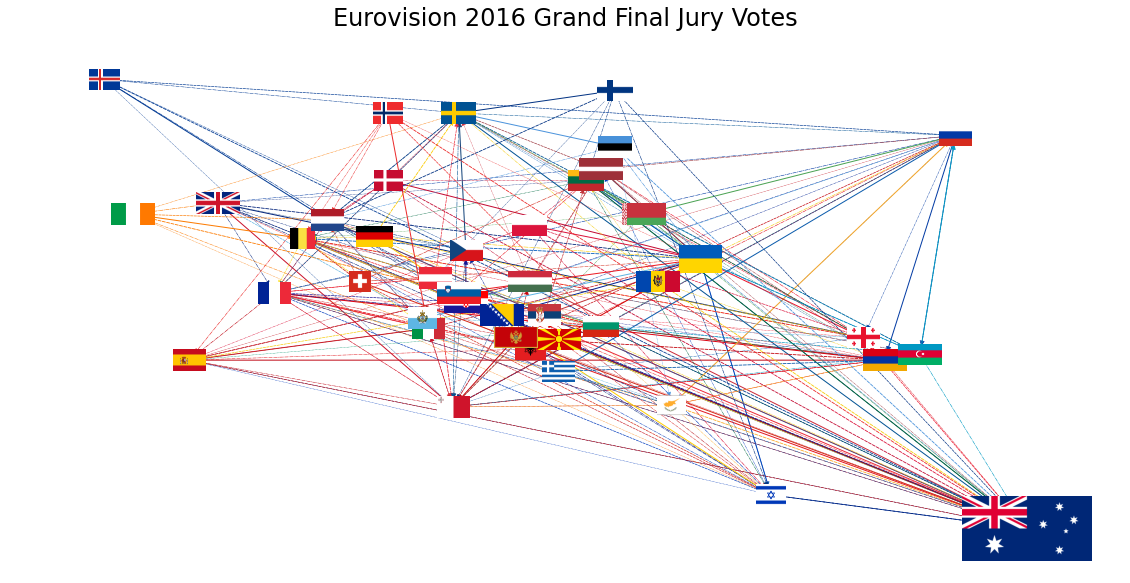

In [24]:
ax=plt.gca()
fig=plt.gcf()
plt.axis("off")
plt.title("Eurovision 2016 Grand Final Jury Votes",fontsize = 24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {"top":"off", "bottom":"off", "left":"off", "right":"off",
              "labelleft":"off", "labelbottom":"off"} #flag grid params

styles = ["dotted","dashdot","dashed","solid"] # line styles

pos = position
    
# draw edges
for e in G.edges(data=True):
    width = e[2]['Jury Points']/12 #normalize by the max. point
    style=styles[int(width*3)]
    if width>0.3: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes    
for node in G.nodes():      
    imsize = max((0.3*G.in_degree(node,weight='Jury Points')
                  /max(dict(G.in_degree(weight='Jury Points')).values()))**2,0.03)
    
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    country.axis("off")

plt.savefig("images/jury_votes.png")

In [25]:
G_televote = nx.from_pandas_edgelist(televote, 
                            source='From country',
                            target='To country',
                            edge_attr='Televote Points',
                            create_using=nx.DiGraph())

In [26]:
G_televote.out_degree(weight='Televote Points')

OutDegreeView({'Albania': 58, 'Hungary': 58, 'Italy': 58, 'Bulgaria': 58, 'Sweden': 58, 'Poland': 58, 'Australia': 58, 'Lithuania': 58, 'Russia': 58, 'Ukraine': 58, 'Armenia': 58, 'France': 58, 'Cyprus': 58, 'Malta': 58, 'Georgia': 58, 'Austria': 58, 'Belgium': 58, 'Spain': 58, 'United Kingdom': 58, 'The Netherlands': 58, 'Germany': 58, 'Serbia': 58, 'Azerbaijan': 58, 'Israel': 58, 'Belarus': 58, 'Latvia': 58, 'Bosnia and Herzegovina': 58, 'Croatia': 58, 'Czech Republic': 58, 'Denmark': 58, 'Estonia': 58, 'Macedonia': 58, 'Finland': 58, 'Greece': 58, 'Iceland': 58, 'Ireland': 58, 'Moldova': 58, 'Montenegro': 58, 'Norway': 58, 'San Marino': 58, 'Slovenia': 58, 'Switzerland': 58})

In [27]:
Gsub_televote = G_televote.edge_subgraph([(e[0],e[1]) for e in G_televote.edges(data=True) if e[2]['Televote Points']>0])

In [28]:
print(nx.info(Gsub_televote))

Name: 
Type: DiGraph
Number of nodes: 42
Number of edges: 420
Average in degree:  10.0000
Average out degree:  10.0000


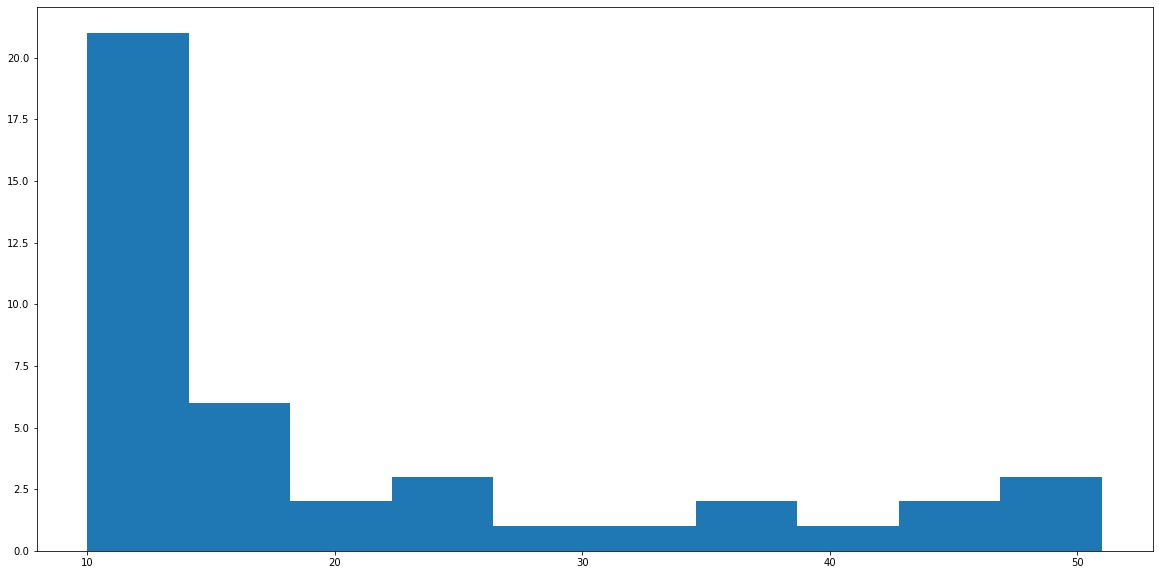

In [29]:
plt.hist(dict(Gsub_televote.degree()).values())
plt.show()

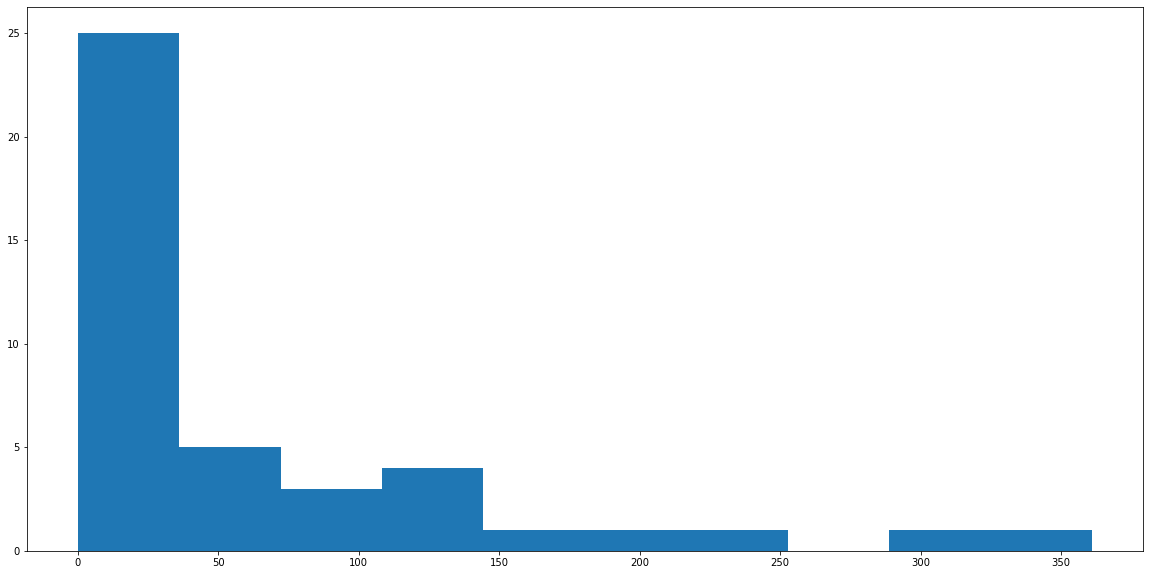

In [30]:
h_televote = plt.hist(dict(G_televote.in_degree(weight='Televote Points')).values())

In [31]:
deg_cen_points_televote = dict(G_televote.in_degree(weight='Televote Points'))
{k:deg_cen_points_televote[k] for k in deg_cen_points_televote if deg_cen_points_televote[k]
        ==max(deg_cen_points_televote.values())}

{'Russia': 361}

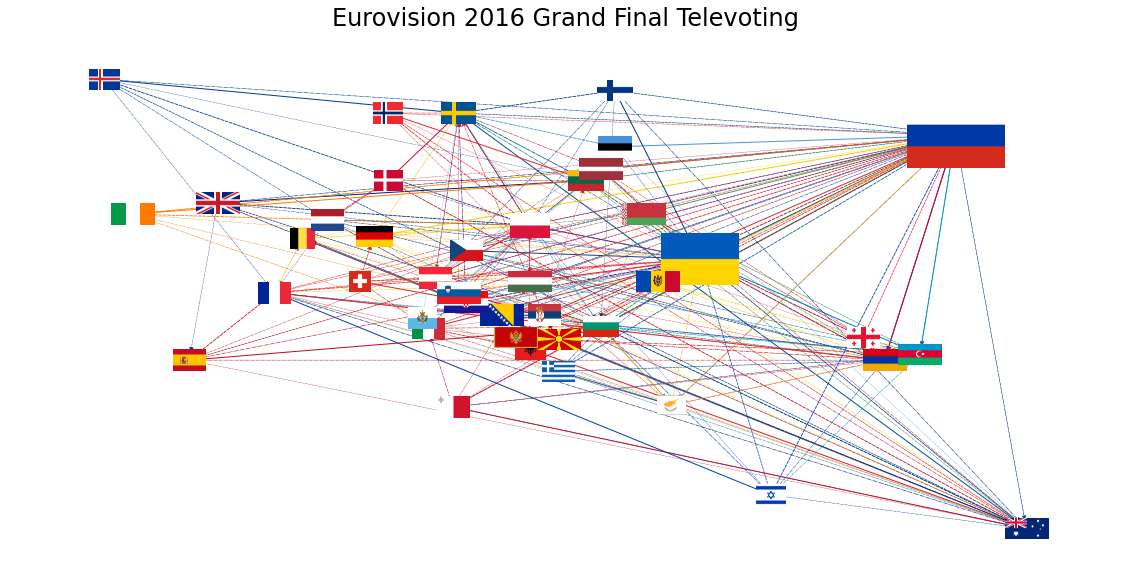

In [32]:
ax=plt.gca()
fig=plt.gcf()
plt.axis("off")
plt.title("Eurovision 2016 Grand Final Televoting",fontsize = 24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {"top":"off", "bottom":"off", "left":"off", "right":"off",
              "labelleft":"off", "labelbottom":"off"} #flag grid params

styles = ["dotted","dashdot","dashed","solid"] # line styles

pos = position
    
# draw edges
for e in G_televote.edges(data=True):
    width = e[2]["Televote Points"]/12 #normalize by the max point
    style=styles[int(width*3)]
    if width>0.3: #filter small votes
        nx.draw_networkx_edges(G_televote,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes    
for node in G_televote.nodes():      
    imsize = max((0.3*G_televote.in_degree(node,weight="Televote Points")
                  /max(dict(G_televote.in_degree(weight="Televote Points")).values()))**2,0.03)
    
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect("equal")
    country.tick_params(**tick_params)
    country.axis("off")

plt.savefig("images/televoting.png")